<a href="https://colab.research.google.com/github/ChideraaN/MaskDetectFYP/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'chiddynnaemeka'
os.environ['KAGGLE_KEY'] = '67f46cf992c1a3af954a7d16e88280c5'

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 97% 202M/207M [00:01<00:00, 116MB/s]
100% 207M/207M [00:01<00:00, 115MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir, 'Train')
test_dir = os.path.join(main_dir, 'Test')
valid_dir = os.path.join(main_dir, 'Validation')

train_mask_dir = os.path.join(train_dir, 'Mask')
train_nomask_dir = os.path.join(train_dir, 'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['1513.jpg', '0417.jpg', '0782.jpg', '1166.jpg', '1576.jpg', '0127.jpg', '0198.jpg', '0901.jpeg', '0913.jpg', '0559.jpg']
['294.jpg', '177.jpg', '139.jpg', '123.jpg', '249.jpg', '288.jpg', '32.jpg', '187.jpg', '204.jpg', '339.jpg']


['/content/New Masks Dataset/Train/Mask/1513.jpg', '/content/New Masks Dataset/Train/Mask/0417.jpg', '/content/New Masks Dataset/Train/Mask/0782.jpg', '/content/New Masks Dataset/Train/Mask/1166.jpg', '/content/New Masks Dataset/Train/Mask/1576.jpg', '/content/New Masks Dataset/Train/Mask/0127.jpg', '/content/New Masks Dataset/Train/Mask/0198.jpg', '/content/New Masks Dataset/Train/Mask/0901.jpeg']
['/content/New Masks Dataset/Train/Non Mask/294.jpg', '/content/New Masks Dataset/Train/Non Mask/177.jpg', '/content/New Masks Dataset/Train/Non Mask/139.jpg', '/content/New Masks Dataset/Train/Non Mask/123.jpg', '/content/New Masks Dataset/Train/Non Mask/249.jpg', '/content/New Masks Dataset/Train/Non Mask/288.jpg', '/content/New Masks Dataset/Train/Non Mask/32.jpg', '/content/New Masks Dataset/Train/Non Mask/187.jpg']


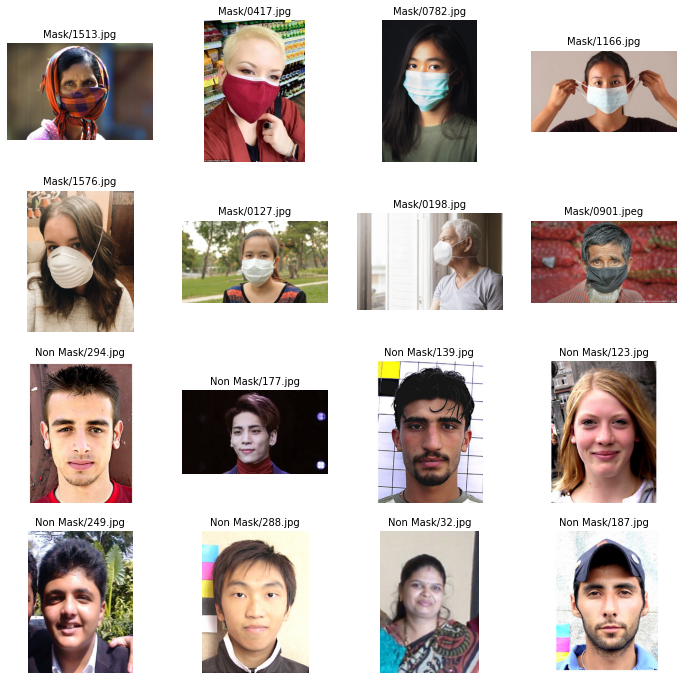

In [ ]:
import matplotlib.image as mpimg

nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir, i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir, i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic+nomask_pic

for i in range(0, len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data, fontsize=10)
  plt.imshow(image, cmap='gray')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='SAME', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='SAME', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 37, 37, 64)       

In [ ]:
model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
es_callback  = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1, verbose=1, baseline=0.895)

In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator,
                    callbacks=[es_callback]
                    )


Epoch 1/30
19/19 [==============================] - 15s 777ms/step - loss: 0.1278 - accuracy: 0.9467 - val_loss: 0.2279 - val_accuracy: 0.9020
Epoch 2/30
19/19 [==============================] - 15s 796ms/step - loss: 0.1352 - accuracy: 0.9500 - val_loss: 0.2642 - val_accuracy: 0.8987
Epoch 2: early stopping


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

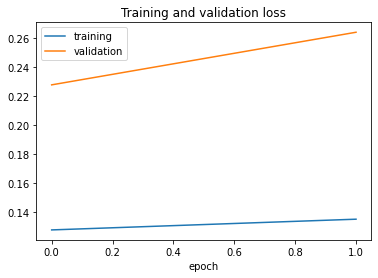

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss, test_acc))

4/4 [==============================] - 1s 309ms/step - loss: 0.2256 - accuracy: 0.9200
test loss:0.2256397008895874 test acc:0.9200000166893005


Text(0.5, 0, 'epoch')

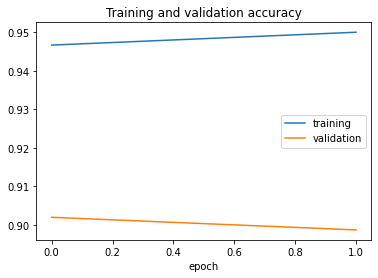

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path, target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('mask')
  else:
    print('no mask')

In [ ]:
test_mask_dir = os.path.join(test_dir, 'Mask')
test_nomask_dir = os.path.join(test_dir, 'Non Mask')

In [ ]:
import glob

In [ ]:
def test_images(path):
  correct = 0
  for img_path in sorted(glob.glob(path)):

    img = image.load_img(img_path, target_size=(150,150))
    images = image.img_to_array(img)
    images = np.expand_dims(images, axis=0)
    prediction = model.predict(images)

    if prediction == 0:
      correct+=1

  accuracy = (correct/len(sorted(glob.glob(path))))*100

  print("The Accuracy Is: ", accuracy)

In [ ]:
test_images('/content/New Masks Dataset/Test/Mask/*')

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')